<a href="https://colab.research.google.com/github/Shafiu1/BanglaBlog/blob/main/unimodal_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow torch transformers pillow numpy pandas scikit-learn torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import os
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
print(os.listdir(folder_path))

['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'best_model.pth', 'bangla_news_model.pth']


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive')

# Define paths
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify folder contents
print("Contents of BanglaNewsClassifier:", os.listdir(folder_path))

# Check if CSV exists
if os.path.exists(csv_path):
    print("headlines.csv found!")
else:
    print("headlines.csv NOT found!")

# Check if image folder exists and list some images
if os.path.exists(image_folder):
    print("Images folder found! First 5 images:", os.listdir(image_folder)[:5])
else:
    print("Images folder NOT found!")

Contents of BanglaNewsClassifier: ['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'best_model.pth', 'bangla_news_model.pth']
headlines.csv found!
Images folder found! First 5 images: ['3006.jpg', '3009.jpg', '3011.jpg', '3010.jpg', '3008.jpg']


In [ ]:
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()  # Sort for consistency
total_images = len(jpg_files)

print(f"Total number of .jpg images: {total_images}")
if total_images == 4007:
    print("Confirmed: 4,007 images found!")
else:
    print(f"Warning: Expected 4,007 images, but found {total_images}!")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

Total number of .jpg images: 4007
Confirmed: 4,007 images found!
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']


In [ ]:
from google.colab import drive
import os
from collections import Counter

# Mount Google Drive
# drive.mount('/content/drive')

# Define image folder path
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# List .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total number of .jpg images: {len(jpg_files)}")

# Check for duplicate base names (ignoring suffixes like _copy or (1))
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}

if duplicates:
    print(f"Found {len(duplicates)} base names with duplicates:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times")
        # List files with this base name
        matching_files = [f for f in jpg_files if f.startswith(name)]
        print(f"Files: {matching_files}")
else:
    print("No duplicate base names found!")

# Check for files beyond 4007.jpg
extra_files = [f for f in jpg_files if f[:-4].isdigit() and int(f[:-4]) > 4007]
print(f"Files beyond 4007.jpg: {len(extra_files)}")
if extra_files:
    print("Extra files:", extra_files[:5])

Total number of .jpg images: 4007
No duplicate base names found!
Files beyond 4007.jpg: 0


In [ ]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
# drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}.jpg")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
# df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনীতি ও ব্যবসা  
3         খেলাধুলা       Entertainment             বিনোদন  
4           বিনোদন          Technology          প্রযুক্

In [ ]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())
print("CSV columns:", df.columns.tolist())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনী

KeyboardInterrupt: 

# UNIMODAL(Text)


Initial samples: 4007


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

LabelEncoder classes: ['অর্থনীতি ও বাণিজ্য', 'খেলাধুলা', 'প্রযুক্তি', 'বিনোদন', 'রাজনীতি', 'স্বাস্থ্য ও জীবনযাপন']


model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Epoch 1:
Train Loss: 0.7305, Val Loss: 0.4218
Train Acc: 0.9312, Val Acc: 0.8552
Epoch 2:
Train Loss: 0.2227, Val Loss: 0.3345
Train Acc: 0.9761, Val Acc: 0.8852
Epoch 3:
Train Loss: 0.0988, Val Loss: 0.3563
Train Acc: 0.9943, Val Acc: 0.9002
Epoch 4:
Train Loss: 0.0385, Val Loss: 0.3491
Train Acc: 0.9993, Val Acc: 0.9135
Epoch 5:
Train Loss: 0.0214, Val Loss: 0.4281
Train Acc: 0.9986, Val Acc: 0.9101


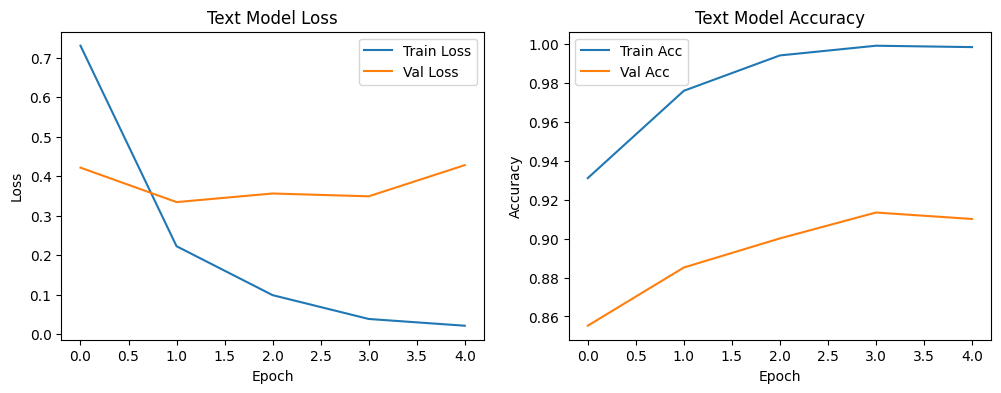

Test Accuracy: 0.9003
Classification Report:
                      precision    recall  f1-score   support

  অর্থনীতি ও বাণিজ্য       0.92      0.92      0.92        92
            খেলাধুলা       0.90      0.90      0.90       114
           প্রযুক্তি       0.96      0.90      0.93        97
              বিনোদন       0.76      0.92      0.83        88
             রাজনীতি       0.94      0.98      0.96       120
স্বাস্থ্য ও জীবনযাপন       0.96      0.75      0.84        91

            accuracy                           0.90       602
           macro avg       0.90      0.90      0.90       602
        weighted avg       0.91      0.90      0.90       602



/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2469 (\N{BENGALI LETTER THA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-pa

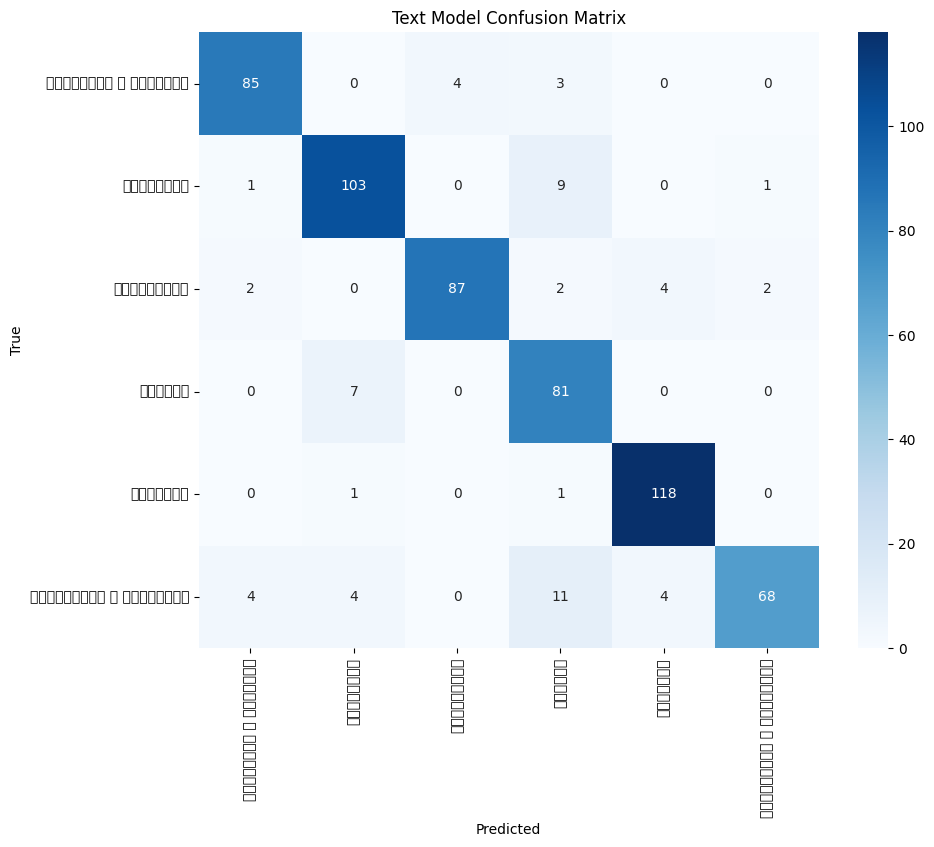

Text Model saved!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
# drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'

# Load CSV
df = pd.read_csv(csv_path)
print(f"Initial samples: {len(df)}")

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)
le_classes = [str(cls) for cls in le.classes_]  # Ensure string labels for classification_report
print("LabelEncoder classes:", le_classes)

# Dataset
class TextNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, labels):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Split dataset
dataset = TextNewsDataset(tokenized_headlines, labels)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 8 if len(df) > 1000 else 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model
class TextNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TextNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = outputs.pooler_output
        text_features = self.dropout(text_features)
        logits = self.classifier(text_features)
        return logits

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TextNewsClassifier(num_classes=len(le_classes)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            if return_preds:
                preds_all.extend(preds.cpu().numpy())
                labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop
num_epochs = 5 if len(df) > 1000 else 10
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Text Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Text Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Text Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/text_news_model.pth')
print("Text Model saved!")

#UNIMODAL(IMAGE)

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive (comment out if already mounted)
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")```python
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Function to list hyperparameters
def list_hyperparameters(df, le):
    hyperparameters = {
        "Data Preprocessing": {
            "Image Size": "(224, 224)",
            "Image Normalization Mean": "[0.485, 0.456, 0.406]",
            "Image Normalization Std": "[0.229, 0.224, 0.225]"
        },
        "Dataset and DataLoader": {
            "Train-Validation-Test Split": "70% train, 15% validation, 15% test",
            "Batch Size": 8 if len(df) > 1000 else 4,
            "Shuffle (Train)": True,
            "Shuffle (Validation/Test)": False
        },
        "Model Architecture": {
            "Base Model": "resnet18 (IMAGENET1K_V1)",
            "Dropout Rate": 0.3,
            "Output Classes": len(le.classes_)
        },
        "Training": {
            "Number of Epochs": 5 if len(df) > 1000 else 10,
            "Loss Function": "CrossEntropyLoss"
        },
        "Optimization": {
            "Optimizer": "Adam",
            "Learning Rate": 2e-5
        }
    }
    print("Hyperparameters Used in the Model:")
    for category, params in hyperparameters.items():
        print(f"\n{category}:")
        for param, value in params.items():
            print(f"  {param}: {value}")
    return hyperparameters

# Mount Google Drive (comment out if already mounted)
# drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")
df = df[df['full_image_path'].apply(os.path.exists)]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও ব্যবসা': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনধারা': 'Health & Lifestyle'
}
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# List hyperparameters
list_hyperparameters(df, le)

# Dataset
class ImageNewsDataset(Dataset):
    def __init__(self, image_paths, labels, transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset
dataset = ImageNewsDataset(df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 8 if len(df) > 1000 else 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model
class ImageNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ImageNewsClassifier, self).__init__()
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, images):
        features = self.image_model(images)
        features = self.dropout(features)
        return features

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImageNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            if return_preds:
                preds_all.extend(preds.cpu().numpy())
                labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop
num_epochs = 5 if len(df) > 1000 else 10
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Image Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Image Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/image_news_model.pth')
print("Image Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)
```

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Map Bangla categories to English for display
category_mapping = {
    'রাজনীতি': 'Politics',
    'খেলাধুলা': 'Sports',
    'অর্থনীতি ও ব্যবসা': 'Economy & Business',
    'বিনোদন': 'Entertainment',
    'প্রযুক্তি': 'Technology',
    'স্বাস্থ্য ও জীবনধারা': 'Health & Lifestyle'
}
# Create English label list for confusion matrix and classification report
le_classes = [category_mapping.get(cls, cls) for cls in le.classes_]
print("Display classes (English):", le_classes)

# Dataset
class ImageNewsDataset(Dataset):
    def __init__(self, image_paths, labels, transform):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset
dataset = ImageNewsDataset(df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 8 if len(df) > 1000 else 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model
class ImageNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ImageNewsClassifier, self).__init__()
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, images):
        features = self.image_model(images)
        features = self.dropout(features)
        return features

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImageNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            if return_preds:
                preds_all.extend(preds.cpu().numpy())
                labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop
num_epochs = 5 if len(df) > 1000 else 10
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Image Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Image Model Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=le_classes))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_classes, yticklabels=le_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Image Model Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/image_news_model.pth')
print("Image Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    # Map Bangla label to English for display
    bangla_label = le.inverse_transform([labels[idx]])[0]
    english_label = category_mapping.get(bangla_label, bangla_label)
    plt.title(f"Label: {english_label}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)


Mounted at /content/drive


#VGG16+LSTM
